In [126]:
import dlib, cv2, pickle,os
import matplotlib.pyplot as plt
import numpy as np
from imutils.face_utils import FaceAligner
# import imutilsls

In [127]:
pose_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat.1')
face_encoder = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

In [128]:
fa = FaceAligner(pose_predictor)

In [7]:
img = cv2.imread("image-57.jpeg")

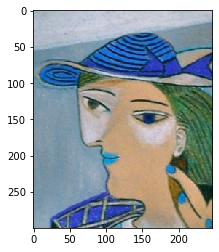

In [8]:
plt.imshow(img)

In [9]:
def p2r(rect):
    """
    point to rectangle converter
    Converts opencv point (x0,y0,x1,y1) to rectangle (x,y,w,h)
    Examples
    --------
    print p2r((200,200,400,450))
    # (200, 200, 200, 250)
    print p2r([200,200,400,450])
    # [200, 200, 200, 250]
    print p2r(np.array([200,200,400,450]))
    # [200 200 200 250]
    """
    dtype = type(rect)
    if dtype == np.ndarray:
        dtype = np.array
    x0, y0, x1, y1 = rect
    return dtype((x0, y0, x1 - x0, y1 - y0))

In [10]:
def iget_big_rect(prects):
    """
    For given list of rectangles return biggest rectangle by its area
    """
    if prects:
        if len(list(prects)) == 1:
            return 0
        rects = map(p2r, prects)
        maxarea, imaxrect = (0, 0)
        for i, rect in enumerate(rects):
            area = rect[2] * rect[3]
            if area > maxarea:
                maxarea, imaxrect = area, i

        return imaxrect
    return 0

In [11]:
def d2p(d, asint=False):
    """
    Convert dlib rectangle to points
    """
    if asint:
        rect = (
         int(d.left()), int(d.top()), int(d.right()), int(d.bottom()))
    else:
        rect = (
         d.left(), d.top(), d.right(), d.bottom())
    return rect

In [12]:
rects = detector(img,1)

In [13]:
rects

rectangles[]

In [14]:
re = rects[0]

IndexError: 

In [15]:
print(rects[0])

IndexError: 

In [16]:
if len(rects) > 0:
    drect = rects[iget_big_rect(map(d2p, rects))]

In [14]:
drect

rectangle(769,167,924,322)

In [15]:
for i in rects:
    print(type(i))
    drect = i[iget_big_rect(map(d2p, i))]
    print(drect)

<class 'dlib.rectangle'>


TypeError: 'dlib.rectangle' object is not iterable

In [58]:
for i in rects:
    x1 = i.left()
    y1 = i.top()
    x2 = i.right()
    y2 = i.bottom()
    print(x1,y1,x2,y2)
    faceAligned = fa.align(img, gray, i)
    cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),5)
    plt.imshow(img)
    landmark = pose_predictor(img,i)
    face_descriptor = face_encoder.compute_face_descriptor(img, landmark, num_jitters=1)
    score = np.linalg.norm(known_faces[0] - np.array(face_descriptor), axis=1)
    scores.append(score)
    imatches = np.argsort(score)
    score = score[imatches]
    print(labels[0][imatches][:10].tolist(), score[:10].tolist())

NameError: name 'rects' is not defined

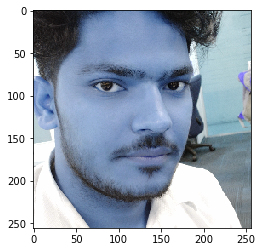

In [24]:
plt.imshow(faceAligned)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

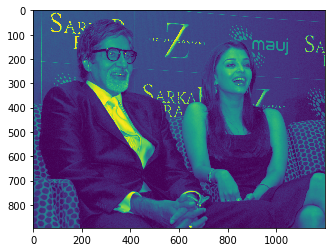

In [8]:
plt.imshow(gray)

In [129]:
modelFile = "opencv_extra/testdata/dnn/opencv_face_detector_uint8.pb"
configFile = "opencv_extra/testdata/dnn/opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [7]:
frameHeight = img.shape[0]
frameWidth = img.shape[1]

In [27]:
blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), [104, 117, 123], False, False)
net.setInput(blob)
detections = net.forward()

In [9]:
detections.shape

(1, 1, 200, 7)

In [10]:
# import json
# with open('result.json', 'w') as f:
# 	json.dump(Results, f)

RuntimeError: Error while calling cudnnCreate(&handles[new_device_id]) in file /tmp/pip-install-nx1vebp2/dlib/dlib/cuda/cudnn_dlibapi.cpp:104. code: 4, reason: A call to cuDNN failed

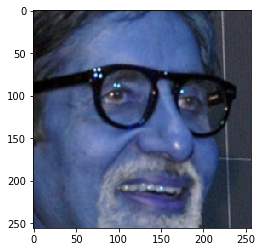

In [18]:
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:
        x1 = int(detections[0, 0, i, 3] * frameWidth)
        y1 = int(detections[0, 0, i, 4] * frameHeight)
        x2 = int(detections[0, 0, i, 5] * frameWidth)
        y2 = int(detections[0, 0, i, 6] * frameHeight)
        faceAligned = fa.align(img, gray,dlib.rectangle(x1,y1,x2,y2))
        plt.figure()
        plt.imshow(faceAligned)
        landmark = pose_predictor(faceAligned,dlib.rectangle(0,0,faceAligned.shape[0],faceAligned.shape[1]))
        face_descriptor = face_encoder.compute_face_descriptor(faceAligned, landmark, num_jitters=1)
        score = np.linalg.norm(known_faces[0] - np.array(face_descriptor), axis=1)
        scores.append(score)
        imatches = np.argsort(score)
        score = score[imatches]
        print(labels[0][imatches][:10].tolist(), score[:10].tolist())
        

In [10]:
known_faces=[]
labels=[]
scores=[]
Results ={}

In [11]:
def loadDescriptor(dbpath):
    known_face_path = os.path.join(dbpath, 'faceDescriptorValues_new.pkl')
    print(known_face_path)
    if os.path.exists(known_face_path):
        print("sad")
        known_label_path = os.path.join(dbpath, 'faceDescriptorLabels.pkl')
        if os.path.exists(known_label_path):
            print(known_face_path)
            known_faces.append(np.load(known_face_path))
            print(known_label_path)
            labels.append(np.load(known_label_path))
            print ('Loading Descriptors Successful')
            return True

In [12]:
loadDescriptor("/home/vision/Documents/Rohit/Face")

/home/vision/Documents/Rohit/Face/faceDescriptorValues_new.pkl
sad
/home/vision/Documents/Rohit/Face/faceDescriptorValues_new.pkl
/home/vision/Documents/Rohit/Face/faceDescriptorLabels.pkl
Loading Descriptors Successful


True

In [14]:
known_faces[0].shape

(688, 128)

In [52]:
type(labels[0])

numpy.ndarray

# Train

In [177]:
!unzip passport/passport.zip

Archive:  passport/passport.zip
   creating: face2/
  inflating: face2/2709_98.jpg       
  inflating: face2/2709_96.jpg       
  inflating: face2/2709_90.jpg       
  inflating: face2/2709_88.jpg       
  inflating: face2/2709_86.jpg       
  inflating: face2/2709_84.jpg       
  inflating: face2/2709_82.jpg       
  inflating: face2/2709_80.jpg       
  inflating: face2/2709_8.jpg        
  inflating: face2/2709_78.jpg       
  inflating: face2/2709_76.jpg       
  inflating: face2/2709_74.jpg       
  inflating: face2/2709_72.jpg       
  inflating: face2/2709_68.jpg       
  inflating: face2/2709_66.jpg       
  inflating: face2/2709_64.jpg       
  inflating: face2/2709_60.jpg       
  inflating: face2/2709_6.jpg        
  inflating: face2/2709_58.jpg       
  inflating: face2/2709_56.jpg       
  inflating: face2/2709_54.jpg       
  inflating: face2/2709_52.jpg       
  inflating: face2/2709_50.jpg       
  inflating: face2/2709_48.jpg       
  inflating: face2/2709_46.jpg      

In [7]:
faces=[]
name=[]

In [8]:
trainpath = "passport/faces"

In [10]:
for im in os.listdir(trainpath):
    print(im)
    img = cv2.imread(os.path.join(trainpath,im))
#     plt.imshow(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frameHeight = img.shape[0]
    frameWidth = img.shape[1]
    blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), [104, 117, 123], False, False)
    net.setInput(blob)
    detections = net.forward()
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.7:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            faceAligned = fa.align(img, gray,dlib.rectangle(x1,y1,x2,y2))
            landmark = pose_predictor(faceAligned,dlib.rectangle(0,0,faceAligned.shape[0],faceAligned.shape[1]))
            face_descriptor = face_encoder.compute_face_descriptor(faceAligned, landmark, num_jitters=2)
            faces.append(face_descriptor)
            name.append(im)
            print(face_descriptor," ",name)

2709_99.jpg
-0.0726251
0.0750667
0.0922298
-0.00510492
-0.0267345
-0.0764541
-0.0225002
-0.0851682
0.115942
-0.0293716
0.227629
-0.00622395
-0.279819
-0.0805155
-0.0353654
0.110404
-0.200802
-0.130809
-0.0891863
-0.0908298
0.0989661
0.050523
0.000130685
-0.00190243
-0.0834086
-0.348885
-0.0148753
-0.179307
0.0856643
-0.108302
0.0104556
-0.0326297
-0.221337
-0.0545325
-0.034589
0.0226176
0.0147605
-0.0471055
0.202154
0.000183359
-0.169707
0.0169844
0.0119052
0.256844
0.18811
0.0598744
0.0103958
-0.102537
0.126294
-0.250776
0.113546
0.140818
0.129531
0.0800347
0.0638124
-0.227014
0.0538041
-0.0155401
-0.292182
0.113192
0.100356
-0.0651824
-0.025917
-0.0116122
0.2106
-0.00903101
-0.107557
-0.0702197
0.140855
-0.160808
-0.00459928
0.0560471
-0.0819496
-0.157953
-0.31944
0.0260624
0.40851
0.115718
-0.226669
0.0707083
-0.176173
-0.0232299
0.101903
-0.015772
-0.0453819
0.0489727
-0.168441
0.0474107
0.1403
-0.0207157
-0.0561567
0.247046
-0.0235863
-0.00141113
0.0829964
0.111928
-0.13122
-0.035

In [11]:
name

['2709_99.jpg',
 '2709_97.jpg',
 '2709_95.jpg',
 '2709_9.jpg',
 '2709_89.jpg',
 '2709_87.jpg',
 '2709_85.jpg',
 '2709_83.jpg',
 '2709_81.jpg',
 '2709_79.jpg',
 '2709_77.jpg',
 '2709_75.jpg',
 '2709_73.jpg',
 '2709_71.jpg',
 '2709_7.jpg',
 '2709_67.jpg',
 '2709_65.jpg',
 '2709_63.jpg',
 '2709_59.jpg',
 '2709_57.jpg',
 '2709_55.jpg',
 '2709_53.jpg',
 '2709_51.jpg',
 '2709_5.jpg',
 '2709_49.jpg',
 '2709_47.jpg',
 '2709_45.jpg',
 '2709_38.jpg',
 '2709_37.jpg',
 '2709_33.jpg',
 '2709_25.jpg',
 '2709_23.jpg',
 '2709_21.jpg',
 '2709_17.jpg',
 '2709_15.jpg',
 '2709_139.jpg',
 '2709_137.jpg',
 '2709_135.jpg',
 '2709_133.jpg',
 '2709_131.jpg',
 '2709_13.jpg',
 '2709_129.jpg',
 '2709_127.jpg',
 '2709_125.jpg',
 '2709_124.jpg',
 '2709_119.jpg',
 '2709_117.jpg',
 '2709_115.jpg',
 '2709_113.jpg',
 '2709_111.jpg',
 '2709_11.jpg',
 '2709_109.jpg',
 '2709_107.jpg',
 '2709_103.jpg',
 '2709_101.jpg',
 '2709_61.jpg']

In [12]:
faces = np.array(faces)
name = np.array(name)

In [14]:
faces[12]

array([-1.63520843e-01,  1.17041066e-01,  2.94444524e-02,  1.30069293e-02,
       -2.26066411e-02, -7.32714087e-02, -4.41996790e-02, -9.57095623e-02,
        1.14036895e-01, -2.97621097e-02,  1.63982600e-01,  5.47555536e-02,
       -2.17336014e-01, -1.28943592e-01, -4.82047051e-02,  4.84814420e-02,
       -1.30554229e-01, -9.01954323e-02, -1.97141007e-01, -5.41349575e-02,
        1.84895173e-02,  4.54686545e-02,  5.39443791e-02, -5.15499637e-02,
       -1.13373481e-01, -3.63880187e-01, -5.66117093e-02, -9.72363055e-02,
        3.42402160e-02, -7.84222484e-02,  6.07095286e-02, -6.67689368e-02,
       -1.84346944e-01, -9.55009982e-02,  4.56659310e-03,  6.45597130e-02,
        3.93675175e-04,  6.11724220e-02,  1.63608968e-01, -2.25515887e-02,
       -1.80475861e-01,  8.60527158e-03,  5.34747802e-02,  2.78608859e-01,
        2.28014648e-01,  8.56280774e-02,  1.56168342e-02, -1.32760614e-01,
        1.18600368e-01, -2.76645094e-01,  1.26123458e-01,  1.16450362e-01,
        1.08405113e-01, -

In [15]:
np.save('face_repr.npy', faces)

In [16]:
np.save('labels.npy', name)

In [192]:
image = cv2.imread("passport/face2/2709_39.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

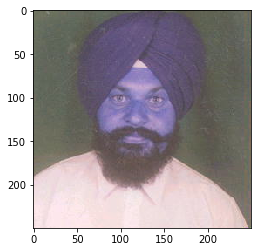

In [193]:
plt.imshow(image)

In [194]:
frameHeight = image.shape[0]
frameWidth = image.shape[1]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123], False, False)
net.setInput(blob)
detections = net.forward()

[0.60461026 0.72232227 0.71203272 0.70931758 0.66603335 0.71539502
 0.6121558  0.66002631 0.60611187 0.65360351 0.64299415 0.63562483
 0.63029795 0.69233292 0.70211416 0.60027949 0.77114803 0.74499635
 0.59406291 0.73682527 0.70577204 0.75937657 0.63828046 0.73985419
 0.68498208 0.69912424 0.58911281 0.7284104  0.45943304 0.67421936
 0.68227289 0.67077892 0.741394   0.79579473 0.61915356 0.69804198
 0.54244007 0.72696158 0.60521284 0.50237507 0.58133618 0.56321772
 0.62499528 0.65483344 0.64932452 0.81122503 0.70417949 0.69983205
 0.72336577 0.74084406 0.64779606 0.61061509 0.62374058 0.76945582
 0.68239956 0.72059468]
[0.60461026 0.72232227 0.71203272 0.70931758 0.66603335 0.71539502
 0.6121558  0.66002631 0.60611187 0.65360351 0.64299415 0.63562483
 0.63029795 0.69233292 0.70211416 0.60027949 0.77114803 0.74499635
 0.59406291 0.73682527 0.70577204 0.75937657 0.63828046 0.73985419
 0.68498208 0.69912424 0.58911281 0.7284104  0.45943304 0.67421936
 0.68227289 0.67077892 0.741394   0.79

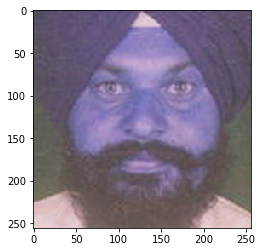

In [199]:
scores=[]
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:
        x1 = int(detections[0, 0, i, 3] * frameWidth)
        y1 = int(detections[0, 0, i, 4] * frameHeight)
        x2 = int(detections[0, 0, i, 5] * frameWidth)
        y2 = int(detections[0, 0, i, 6] * frameHeight)
        faceAligned = fa.align(image, gray,dlib.rectangle(x1,y1,x2,y2))
        plt.figure()
        plt.imshow(faceAligned)
        landmark = pose_predictor(faceAligned,dlib.rectangle(0,0,faceAligned.shape[0],faceAligned.shape[1]))
        face_descriptor = face_encoder.compute_face_descriptor(faceAligned, landmark, num_jitters=2)
        score = np.linalg.norm(faces - np.array(face_descriptor), axis=1)
        print(score)
        scores.append(score)
        print(score)
        imatches = np.argsort(score)
        print(imatches)
        score = score[imatches]
        print(score)
        print(name[imatches])
        print(name[imatches][:10].tolist(), score[:10].tolist())

In [76]:
score[:10].tolist()

[0.36765380593478714,
 0.5643159430089879,
 0.5734525530555676,
 0.577797952975719,
 0.5828082797325995,
 0.5863802499889746,
 0.5938795753750639,
 0.5986808291202756,
 0.6087775550666593,
 0.613322909084652]

In [77]:
name[imatches][:10].tolist()

['2709_7.jpg',
 '2709_111.jpg',
 '2709_124.jpg',
 '2709_139.jpg',
 '2709_73.jpg',
 '2709_9.jpg',
 '2709_45.jpg',
 '2709_15.jpg',
 '2709_83.jpg',
 '2709_129.jpg']

In [145]:
scores

[array([0.7188999 , 0.43851319, 0.6695917 , 0.59093944, 0.75474301,
        0.70782128, 0.65957329, 0.70950164, 0.76186437, 0.67078187,
        0.70338195, 0.80610059, 0.75714645, 0.88299334, 0.75265771,
        0.77230377, 0.744351  , 0.80382505, 0.67985595, 0.8637159 ,
        0.66605683, 0.68018079, 0.61564108, 0.67507667, 0.69990714,
        0.7481338 , 0.78430681, 0.6783406 , 0.75816667, 0.67129326,
        0.65639473, 0.77606193, 0.63536805, 0.73008506, 0.67647771,
        0.58816028, 0.7625342 , 0.76243476, 0.71166602, 0.76718626,
        0.62763022, 0.75334754, 0.84035783, 0.75968354, 0.83552766,
        0.87255439, 0.7350364 , 0.56371701, 0.75596774, 0.6313878 ,
        0.69946842, 0.75276262])]

In [146]:
score

array([0.43851319, 0.56371701, 0.58816028, 0.59093944, 0.61564108,
       0.62763022, 0.6313878 , 0.63536805, 0.65639473, 0.65957329,
       0.66605683, 0.6695917 , 0.67078187, 0.67129326, 0.67507667,
       0.67647771, 0.6783406 , 0.67985595, 0.68018079, 0.69946842,
       0.69990714, 0.70338195, 0.70782128, 0.70950164, 0.71166602,
       0.7188999 , 0.73008506, 0.7350364 , 0.744351  , 0.7481338 ,
       0.75265771, 0.75276262, 0.75334754, 0.75474301, 0.75596774,
       0.75714645, 0.75816667, 0.75968354, 0.76186437, 0.76243476,
       0.7625342 , 0.76718626, 0.77230377, 0.77606193, 0.78430681,
       0.80382505, 0.80610059, 0.83552766, 0.84035783, 0.8637159 ,
       0.87255439, 0.88299334])

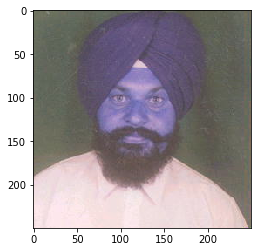

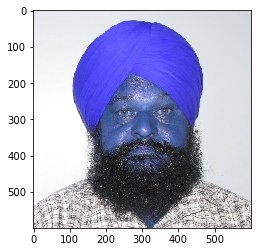

In [196]:
plt.figure()
plt.imshow(image)
plt.figure()
plt.imshow(cv2.imread("passport/faces/2709_37.jpg"))

# Backup

[(265, 50) (322, 117)]
(256, 256, 3)
<class 'dlib.rectangle'>
[b'extract0_Jhonny_Lever', b'extract0_Larry_Donald', b'extract0_Larenz_Tate', b'extract1_Larenz_Tate', b'extract0_Eddie_Jordan', b'extract0_Justin_Gatlin', b'extract0_DAngelo_Jimenez', b'extract0_Idi_Amin', b'extract0_Carlos_Alberto', b'extract0_Abdoulaye_Wade'] [0.4794248839548441, 0.5203153088570437, 0.5224450275462894, 0.5224450275462894, 0.5357436088269943, 0.5453053180214084, 0.5649711808216569, 0.5720553470988654, 0.57598201837299, 0.5826838844305616]
[(84, 47) (141, 115)]
(256, 256, 3)
<class 'dlib.rectangle'>
[b'extract0_Eduard_Shevardnadze', b'extract0_Ilan_Goldfajn', b'extract0_Ashwath', b'extract0_Gulzhar', b'extract0_Anne_Krueger', b'extract0_Ignacio_Antonio_Velasco', b'extract0_Eddy_Hartenstein', b'extract0_Ian_Knop', b'extract0_Interrogation_Vijay_Mallya_image1', b'extract0_K.Viswanath'] [0.5374310467678846, 0.5413638973858688, 0.5627755822238979, 0.5635269315835597, 0.5831514590554289, 0.5844843692027555, 0.58

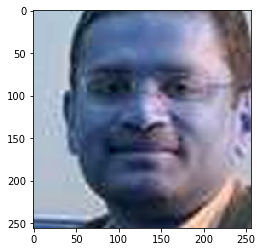

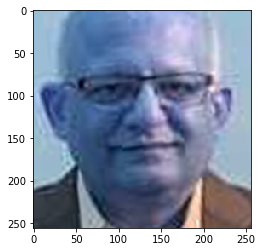

In [105]:
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:
        x1 = int(detections[0, 0, i, 3] * frameWidth)
        y1 = int(detections[0, 0, i, 4] * frameHeight)
        x2 = int(detections[0, 0, i, 5] * frameWidth)
        y2 = int(detections[0, 0, i, 6] * frameHeight)
#         print(x1,y1,x2,y2)
        print(dlib.rectangle(x1,y1,x2,y2))
        faceAligned = fa.align(img, gray,dlib.rectangle(x1,y1,x2,y2))
        print(faceAligned.shape)
        plt.figure()
        plt.imshow(faceAligned)
        drects = detector(faceAligned, 1)
        if len(drects) > 0:
            drect = drects[iget_big_rect(map(d2p, drects))]
        print(type(drect))
        landmark = pose_predictor(faceAligned,dlib.rectangle(0,0,faceAligned.shape[0],faceAligned.shape[1]))
        face_descriptor = face_encoder.compute_face_descriptor(faceAligned, landmark, num_jitters=1)
        score = np.linalg.norm(known_faces[0] - np.array(face_descriptor), axis=1)
        scores.append(score)
        imatches = np.argsort(score)
        score = score[imatches]
        print(labels[0][imatches][:10].tolist(), score[:10].tolist())
        

In [13]:
def findface(img):
    modelFile = "opencv_extra/testdata/dnn/opencv_face_detector_uint8.pb"
    configFile = "opencv_extra/testdata/dnn/opencv_face_detector.pbtxt"
    net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)
    frameHeight = img.shape[0]
    frameWidth = img.shape[1]
    blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), [104, 117, 123], False, False)
    net.setInput(blob)
    detections = net.forward()
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.7:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),2)
            plt.imshow(img)

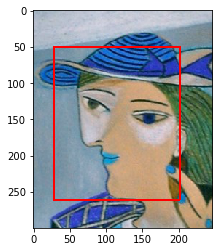

In [14]:
findface(cv2.imread("image-57.jpeg"))

In [11]:
import os

In [13]:
os.getcwd()

'/home/vision/Documents/Rohit/Face'

In [8]:
import json

In [10]:
result = json.load(open("result.json"))

In [17]:
result

{'extract0_searchImage.jpeg': {'matched_faces': ['extract0_Aamir_Khan',
   'extract0_Daniel_Radcliffe',
   'extract0_Feliciano_Lopez',
   'extract0_IMG_0624',
   'extract0_Hal_Sellers',
   'extract0_PV_Sindhu',
   'extract0_Interrogation_Illiyas_image1',
   'extract0_Amitabh_Bachchan',
   'extract0_Interrogation_Hafiz_Saeed_image3',
   'extract0_Sourav_Ganguly',
   'extract0_Fernando_Alonso',
   'extract0_Ranbeer_Singh',
   'extract0_Rahul_Dravid',
   'extract0_Daniel_Darnell',
   'extract0_Interrogation_Hafiz_Saeed_image5',
   'extract0_Adam_Scott',
   'extract0_Interrogation_Masood_Azhar_image1',
   'extract0_Asif_Ali_Zardari',
   'extract0_masood',
   'extract0_Jai_Hemant_Shroff'],
  'distance': [0.4165684835768177,
   0.575994608334772,
   0.578311563725437,
   0.5825160234334349,
   0.6020473552889848,
   0.6024199027722249,
   0.6126948936011973,
   0.6243371297737607,
   0.6268265088886613,
   0.6283135808540325,
   0.6302764622764174,
   0.6333660924560098,
   0.635347497350750

In [16]:
for attr,val in result["extract0_searchImage.jpeg"].items():
    print(attr," ++ ",val)

matched_faces  ++  ['extract0_Aamir_Khan', 'extract0_Daniel_Radcliffe', 'extract0_Feliciano_Lopez', 'extract0_IMG_0624', 'extract0_Hal_Sellers', 'extract0_PV_Sindhu', 'extract0_Interrogation_Illiyas_image1', 'extract0_Amitabh_Bachchan', 'extract0_Interrogation_Hafiz_Saeed_image3', 'extract0_Sourav_Ganguly', 'extract0_Fernando_Alonso', 'extract0_Ranbeer_Singh', 'extract0_Rahul_Dravid', 'extract0_Daniel_Darnell', 'extract0_Interrogation_Hafiz_Saeed_image5', 'extract0_Adam_Scott', 'extract0_Interrogation_Masood_Azhar_image1', 'extract0_Asif_Ali_Zardari', 'extract0_masood', 'extract0_Jai_Hemant_Shroff']
distance  ++  [0.4165684835768177, 0.575994608334772, 0.578311563725437, 0.5825160234334349, 0.6020473552889848, 0.6024199027722249, 0.6126948936011973, 0.6243371297737607, 0.6268265088886613, 0.6283135808540325, 0.6302764622764174, 0.6333660924560098, 0.6353474973507502, 0.6386563390012812, 0.6407209521418361, 0.6411555800898141, 0.6414673463989439, 0.642384074093581, 0.6432324593267315, 0

In [62]:
idx = 0
for e, i in enumerate(result['extract0_searchImage.jpeg']["distance"]):
    if i < 0.5:
        print(i)
        idx = e
    else:
        break

0.4165684835768177


In [63]:
idx

0

In [72]:
val = result["extract0_searchImage.jpeg"]["matched_faces"][:idx+1]

In [73]:
val

['extract0_Aamir_Khan']

In [29]:
faces = np.load("faceDescriptorValues_new.pkl")
labels = np.load("faceDescriptorLabels.pkl")

In [30]:
faces.shape

(688, 128)

In [31]:
labels.shape

(688,)

In [154]:
img = cv2.imread("passport_image/PP_PAN_Images/6/PP6.jpg")

In [146]:
imgname = ["Aamir_Khan"]

In [75]:
imgname

['Aamir_Khan']

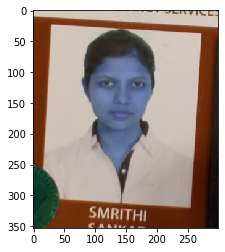

In [155]:
plt.imshow(img)

In [157]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
frameHeight = img.shape[0]
frameWidth = img.shape[1]
blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), [104, 117, 123], False, False)
net.setInput(blob)
detections = net.forward()
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:
        x1 = int(detections[0, 0, i, 3] * frameWidth)
        y1 = int(detections[0, 0, i, 4] * frameHeight)
        x2 = int(detections[0, 0, i, 5] * frameWidth)
        y2 = int(detections[0, 0, i, 6] * frameHeight)
        faceAligned = fa.align(img, gray,dlib.rectangle(x1,y1,x2,y2))
        landmark = pose_predictor(faceAligned,dlib.rectangle(0,0,faceAligned.shape[0],faceAligned.shape[1]))
        face_descriptor = face_encoder.compute_face_descriptor(faceAligned, landmark, num_jitters=2)
        score = np.linalg.norm(faces[np.where(name=="PP6.jpg")] - np.array(face_descriptor), axis=1)
        print(score)
#                     print(imgnumber)
        scores.append(score)
#                     print(score)
        imatches = np.argsort(score)
#                     print(imatches)
        score = score[imatches]
        print(score)

[0.06951748]
[0.06951748]


In [71]:
np.squeeze(imgname).shape

()

In [77]:
label = list(labels)

In [86]:
faces.shape

(699, 128)

In [78]:
label.append("Amir")

In [84]:
label = np.array(label)

In [85]:
label.shape

(1,)

In [ ]:
faces.dump

In [130]:
path = "passport_image/PP_PAN_Images"

In [131]:
faces=[]
name=[]

In [132]:
for i in os.listdir(path):
    for j in os.listdir(os.path.join(path,i)):
        if j.startswith("PP"):
            print(j)
            img = cv2.imread(os.path.join(path,i,j))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            frameHeight = img.shape[0]
            frameWidth = img.shape[1]
            blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), [104, 117, 123], False, False)
            net.setInput(blob)
            detections = net.forward()
            for i in range(detections.shape[2]):
                confidence = detections[0, 0, i, 2]
                if confidence > 0.7:
                    x1 = int(detections[0, 0, i, 3] * frameWidth)
                    y1 = int(detections[0, 0, i, 4] * frameHeight)
                    x2 = int(detections[0, 0, i, 5] * frameWidth)
                    y2 = int(detections[0, 0, i, 6] * frameHeight)
                    faceAligned = fa.align(img, gray,dlib.rectangle(x1,y1,x2,y2))
                    landmark = pose_predictor(faceAligned,dlib.rectangle(0,0,faceAligned.shape[0],faceAligned.shape[1]))
                    face_descriptor = face_encoder.compute_face_descriptor(faceAligned, landmark, num_jitters=2)
                    faces.append(face_descriptor)
                    name.append(j)
#                     print(face_descriptor," ",name)

PP9.jpg
PP8.jpg
PP7.jpg
PP6.jpg
PP5.jpg
PP4.jpg
PP3.jpg
PP2.jpg
PP14.jpg
PP13.jpg
PP12.jpg
PP11.jpg
PP10.jpg
PP1.jpg


In [133]:
faces = np.array(faces)
name = np.array(name)

In [134]:
faces.shape

(14, 128)

In [135]:
name.shape

(14,)

PAN9.jpg
['PP14.jpg', 'PP4.jpg', 'PP10.jpg', 'PP13.jpg', 'PP9.jpg'] [0.6170417656341852, 0.6375367836735495, 0.679608412793532, 0.6826367652885108, 0.7085073793200333]
passport_image/PP_PAN_Images/14/PP14.jpg
PAN8.jpg
['PP14.jpg', 'PP13.jpg', 'PP4.jpg', 'PP10.jpg', 'PP1.jpg'] [0.5613001838013871, 0.6138922447204374, 0.6379169116561981, 0.6426663359265764, 0.6525378071811008]
passport_image/PP_PAN_Images/14/PP14.jpg
PAN7.jpg
['PP13.jpg', 'PP5.jpg', 'PP3.jpg', 'PP1.jpg', 'PP7.jpg'] [0.6038132353295597, 0.6040927345853527, 0.6228144043593059, 0.6333666488141119, 0.6410484478778521]
passport_image/PP_PAN_Images/13/PP13.jpg
PAN6.jpg
['PP3.jpg', 'PP12.jpg', 'PP14.jpg', 'PP13.jpg', 'PP10.jpg'] [0.7186067475863471, 0.7432006902162698, 0.7464096209679028, 0.7570402031585444, 0.7575873080797337]
passport_image/PP_PAN_Images/3/PP3.jpg
PAN5.jpg
['PP5.jpg', 'PP3.jpg', 'PP9.jpg', 'PP7.jpg', 'PP1.jpg'] [0.30208608297483386, 0.5192263133555627, 0.5198023916707785, 0.5484534956585403, 0.564938088132464

/home/vision/anaconda3/envs/rohitenv/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/vision/anaconda3/envs/rohitenv/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


PAN10.jpg
['PP10.jpg', 'PP11.jpg', 'PP6.jpg', 'PP13.jpg', 'PP2.jpg'] [0.5429192523731827, 0.5873713237541581, 0.5968397538451217, 0.597178130104372, 0.6084122915069987]
passport_image/PP_PAN_Images/10/PP10.jpg
PAN1.jpg
['PP1.jpg', 'PP5.jpg', 'PP7.jpg', 'PP8.jpg', 'PP3.jpg'] [0.4911332584046889, 0.5451927996004536, 0.566157655445393, 0.5691260302785959, 0.5990329952319106]
passport_image/PP_PAN_Images/1/PP1.jpg


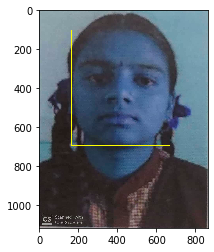

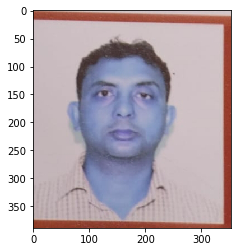

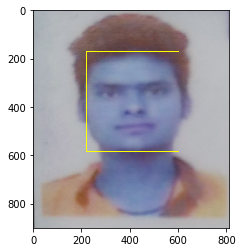

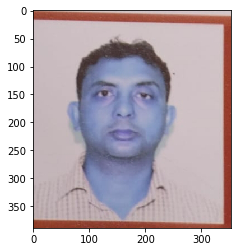

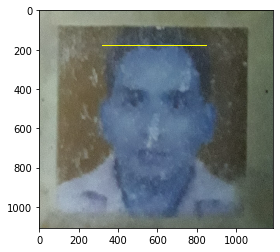

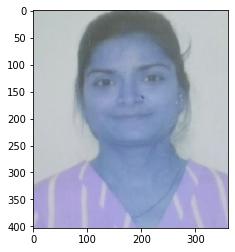

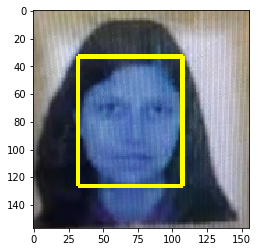

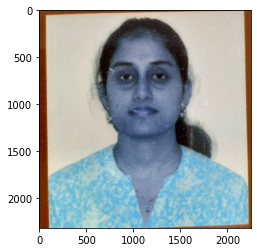

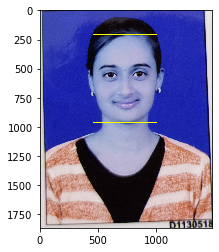

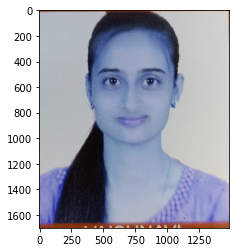

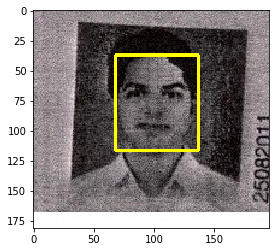

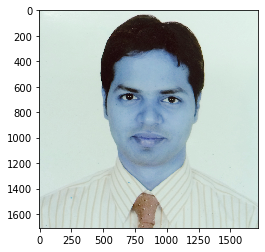

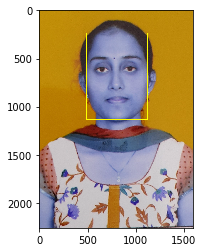

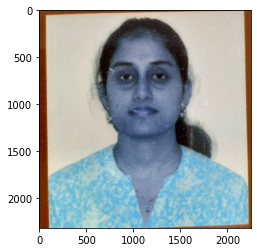

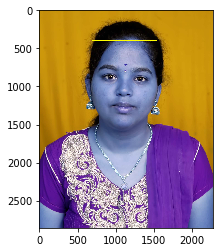

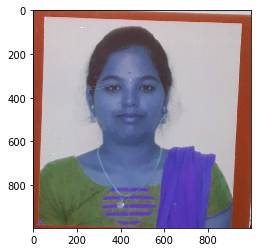

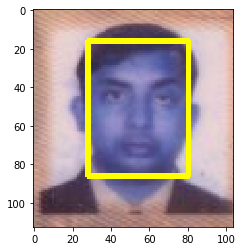

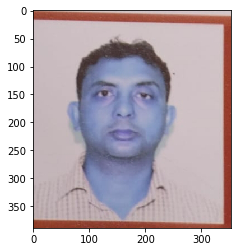

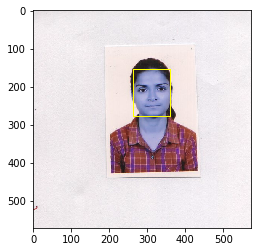

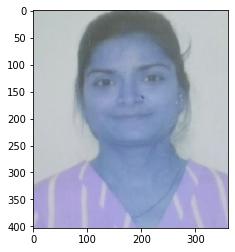

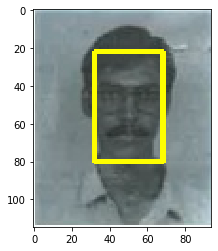

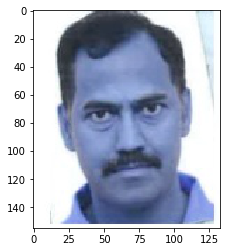

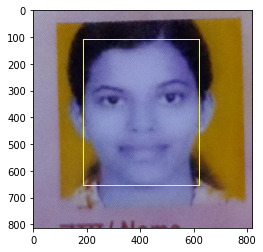

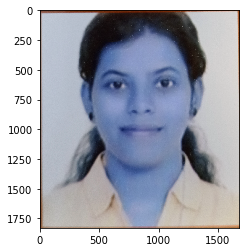

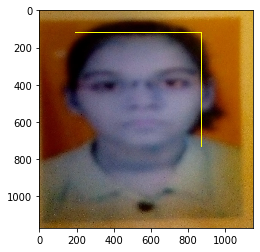

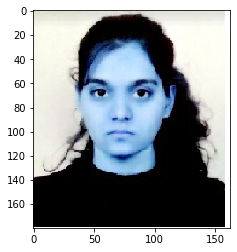

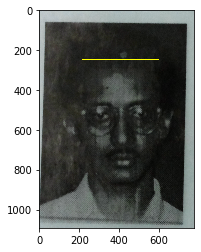

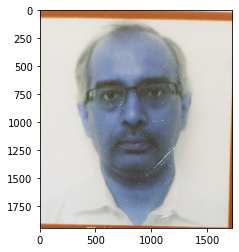

In [117]:
for i in os.listdir(path):
    for j in os.listdir(os.path.join(path,i)):
        if j.startswith("PAN"):
            image = cv2.imread(os.path.join(path,i,j))
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#             plt.imshow(image)
            frameHeight = image.shape[0]
            frameWidth = image.shape[1]
            blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123], False, False)
            net.setInput(blob)
            detections = net.forward()
            scores=[]
            for i in range(detections.shape[2]):
                confidence = detections[0, 0, i, 2]
                if confidence > 0.7:
                    x1 = int(detections[0, 0, i, 3] * frameWidth)
                    y1 = int(detections[0, 0, i, 4] * frameHeight)
                    x2 = int(detections[0, 0, i, 5] * frameWidth)
                    y2 = int(detections[0, 0, i, 6] * frameHeight)
                    cv2.rectangle(image,(x1,y1),(x2,y2),(255,255,0),2)
                    faceAligned = fa.align(image, gray,dlib.rectangle(x1,y1,x2,y2))
                    landmark = pose_predictor(faceAligned,dlib.rectangle(0,0,faceAligned.shape[0],faceAligned.shape[1]))
                    face_descriptor = face_encoder.compute_face_descriptor(faceAligned, landmark, num_jitters=2)
                    score = np.linalg.norm(faces - np.array(face_descriptor), axis=1)
#                     print(score)
                    scores.append(score)
#                     print(score)
                    imatches = np.argsort(score)
#                     print(imatches)
                    score = score[imatches]
#                     print(score)
#                     print(name[imatches])
                    print(j)
                    print(name[imatches][:5].tolist(), score[:5].tolist())
                    plt.figure()
                    plt.imshow(image)
                    plt.figure()
                    print(os.path.join(path,name[imatches][0].split(".")[0][2:],name[imatches][0]))
                    img = cv2.imread(os.path.join(path,name[imatches][0].split(".")[0][2:],name[imatches][0]))
#                     print(os.path.join(path,name[imatches][0].split(".")[0][-2:],name[imatches][0]))
#                     print(img)
                    plt.imshow(img)
#         break

In [125]:
for i in os.listdir(path):
    for j in os.listdir(os.path.join(path,i)):
        if j.startswith("PAN"):
            imgnumber = (j.split(".")[0][3:])
            image = cv2.imread(os.path.join(path,i,j))
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#             plt.imshow(image)
            frameHeight = image.shape[0]
            frameWidth = image.shape[1]
            blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123], False, False)
            net.setInput(blob)
            detections = net.forward()
            scores=[]
            for i in range(detections.shape[2]):
                confidence = detections[0, 0, i, 2]
                if confidence > 0.7:
                    x1 = int(detections[0, 0, i, 3] * frameWidth)
                    y1 = int(detections[0, 0, i, 4] * frameHeight)
                    x2 = int(detections[0, 0, i, 5] * frameWidth)
                    y2 = int(detections[0, 0, i, 6] * frameHeight)
                    cv2.rectangle(image,(x1,y1),(x2,y2),(255,255,0),2)
                    faceAligned = fa.align(image, gray,dlib.rectangle(x1,y1,x2,y2))
                    landmark = pose_predictor(faceAligned,dlib.rectangle(0,0,faceAligned.shape[0],faceAligned.shape[1]))
                    face_descriptor = face_encoder.compute_face_descriptor(faceAligned, landmark, num_jitters=2)
                    print(name[np.where(name=="PP"+str(imgnumber)+".jpg")], " ", j)
                    score = np.linalg.norm(faces[np.where(name=="PP"+str(imgnumber)+".jpg")] - np.array(face_descriptor), axis=1)
                    print(score)
#                     print(imgnumber)
                    scores.append(score)
#                     print(score)
                    imatches = np.argsort(score)
#                     print(imatches)
                    score = score[imatches]
                    print(score)

['PP9.jpg']   PAN9.jpg
[0.70088042]
[0.70088042]
['PP8.jpg']   PAN8.jpg
[0.66297432]
[0.66297432]
['PP7.jpg']   PAN7.jpg
[0.64104592]
[0.64104592]
['PP6.jpg']   PAN6.jpg
[0.69398506]
[0.69398506]
['PP5.jpg']   PAN5.jpg
[0.30749069]
[0.30749069]
['PP4.jpg']   PAN4.jpg
[0.55503245]
[0.55503245]
['PP3.jpg']   PAN3.jpg
[0.31582674]
[0.31582674]
['PP2.jpg']   PAN2.jpg
[0.28664769]
[0.28664769]
['PP14.jpg']   PAN14.jpg
[0.44304905]
[0.44304905]
['PP13.jpg']   PAN13.jpg
[0.33313443]
[0.33313443]
['PP12.jpg']   PAN12.jpg
[0.6238434]
[0.6238434]
['PP11.jpg']   PAN11.jpg
[0.35236827]
[0.35236827]
['PP10.jpg']   PAN10.jpg
[0.58162812]
[0.58162812]
['PP1.jpg']   PAN1.jpg
[0.48832958]
[0.48832958]


In [101]:
name

array(['PP9.jpg', 'PP8.jpg', 'PP7.jpg', 'PP6.jpg', 'PP5.jpg', 'PP4.JPG',
       'PP3.jpg', 'PP2.jpg', 'PP14.jpg', 'PP13.jpg', 'PP12.jpg',
       'PP11.jpg', 'PP10.jpg', 'PP1.jpg'], dtype='<U8')

In [98]:
itemindex = np.where(name=="PP9.jpg")

In [105]:
print(name[0])
print(faces[0])


PP9.jpg
[-0.16401418 -0.0037552   0.01234851 -0.08595132 -0.03735701 -0.02154666
 -0.01735568 -0.13977627  0.16793928 -0.19563197  0.15065333  0.00649091
 -0.12050936 -0.06345501 -0.03380824  0.10546346 -0.1721622  -0.20289075
 -0.01198022 -0.07220369  0.03659531 -0.00416056 -0.03166829  0.06268166
 -0.25150225 -0.29963312 -0.09096136 -0.12015952  0.01640911 -0.01785948
  0.00308027  0.01727046 -0.22000155  0.02764591 -0.01003609  0.15469876
  0.02753042 -0.08503113  0.14225635 -0.01516605 -0.22650672 -0.0286872
  0.09951476  0.23052205  0.17409876 -0.03227106 -0.02213639 -0.04971036
  0.1422821  -0.2193523   0.02015832  0.07371835  0.07479343  0.02546853
  0.07562481 -0.10434753  0.0426691   0.09173597 -0.23467526 -0.01901317
 -0.02473917 -0.03781388  0.00934597 -0.0388432   0.18169045  0.13666934
 -0.09409089 -0.07936743  0.21497774 -0.20120579 -0.01199829  0.02433876
 -0.07335892 -0.1945948  -0.28464276 -0.0128245   0.38995939  0.21218912
 -0.05602252  0.13310507 -0.05860841 -0.0484

In [106]:
faces[np.where(name=="PP9.jpg")]

array([[-0.16401418, -0.0037552 ,  0.01234851, -0.08595132, -0.03735701,
        -0.02154666, -0.01735568, -0.13977627,  0.16793928, -0.19563197,
         0.15065333,  0.00649091, -0.12050936, -0.06345501, -0.03380824,
         0.10546346, -0.1721622 , -0.20289075, -0.01198022, -0.07220369,
         0.03659531, -0.00416056, -0.03166829,  0.06268166, -0.25150225,
        -0.29963312, -0.09096136, -0.12015952,  0.01640911, -0.01785948,
         0.00308027,  0.01727046, -0.22000155,  0.02764591, -0.01003609,
         0.15469876,  0.02753042, -0.08503113,  0.14225635, -0.01516605,
        -0.22650672, -0.0286872 ,  0.09951476,  0.23052205,  0.17409876,
        -0.03227106, -0.02213639, -0.04971036,  0.1422821 , -0.2193523 ,
         0.02015832,  0.07371835,  0.07479343,  0.02546853,  0.07562481,
        -0.10434753,  0.0426691 ,  0.09173597, -0.23467526, -0.01901317,
        -0.02473917, -0.03781388,  0.00934597, -0.0388432 ,  0.18169045,
         0.13666934, -0.09409089, -0.07936743,  0.2